In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import uniform
# import random as rand
# from scipy.stats import norm

# $\alpha$-stable distribution

In [3]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

# Levy processes

In [4]:
def simulate_process(Z, n, delta):
    X = [0]
    for k in range(n-1):
        X.append(X[k] + Z[k])
    return X

In [5]:
Z_br = np.random.normal(0, delta, n)
X_br = simulate_process(Z_br, n, delta)

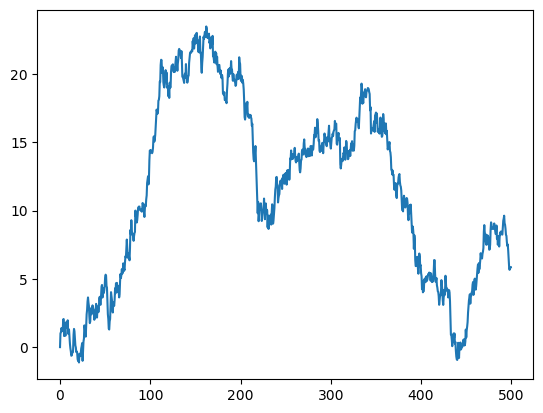

In [6]:
t_br = [k * delta for k in range(n)]
plt.plot(t_br, X_br)

In [7]:
X_br[1]

1.0177491376499384

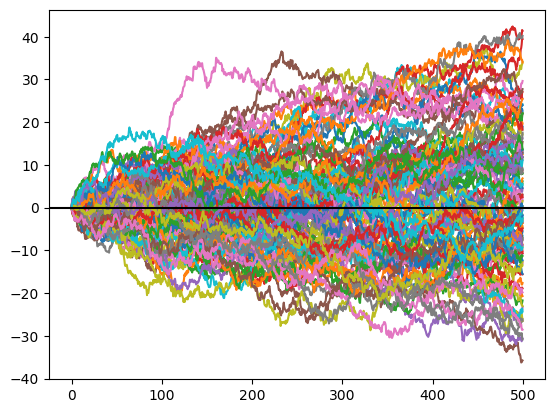

In [26]:
N = 100
X_br = []
for i in range(N):
    Z_br = np.random.normal(0, delta, n)
    X_br.append(simulate_process(Z_br, n, delta))
X_br = np.array(X_br)
t_br = [k * delta for k in range(n)]
plt.plot(t_br, np.transpose(X_br))
plt.axhline(0, color = 'black')
plt.show()

In [8]:
def plus(x):
    return max(0, x)

In [13]:
def simulate_alpha_stable_pr(n, delta, alpha):
    beta = 0
    gamma = delta**(1 / alpha)
    delt = 0
    Z = stable(alpha, beta, gamma, delt, n)
    X = simulate_process(Z, n, delta)
    return X

In [29]:
def f_flsm(x, t, H, alpha):
    return plus(t - x)**(H - 1/alpha) - plus(-x)**(H - 1/alpha)

In [54]:
def simulate_flsn(M1, M2, I, H, alpha, t):
    s = np.linspace(-M1, M2, I)
    Z = simulate_alpha_stable_pr(I, 1, alpha)
    incr = np.diff(Z)
    X = np.zeros(len(t))
    for i, t_i in enumerate(t):
        for j, s_j in enumerate(s[:-1]):
            X[i] += f_flsm(s_j, t_i, H, alpha) * incr[j]
        X[i] = np.sum(X[i])
    return X

In [74]:
T = 300
M1 = 100
M2 = T
I = M1 + M2 + 1
H = 0.9
alpha = 1.5
t = np.linspace(0, T, T+1)
Z = simulate_flsn(M1, M2, I, H, alpha, t)

In [ ]:
for i in range(5):
    Z = simulate_flsn(M1, M2, I, H, alpha, t)
    plt.plot(t, Z)
plt.title("Fractional Levi stable motion")
plt.show()

In [ ]:
for i in range(5):
    Z = simulate_flsn(M1, M2, I, H, alpha, t)
    incr = np.diff(Z)
    plt.plot(t[:-1], incr)
plt.show()

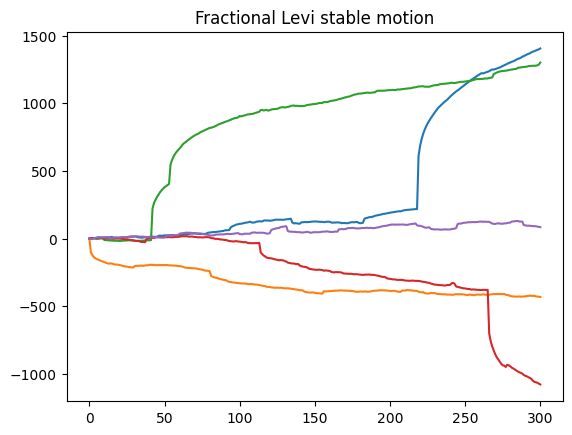

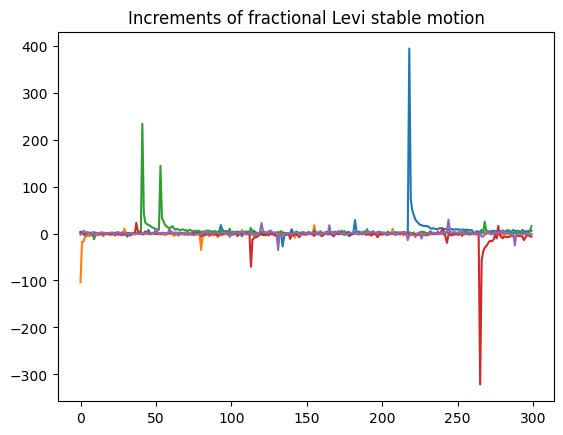

In [75]:
N = 5
Z = []
incr = []
for i in range(N):
    Z.append(simulate_flsn(M1, M2, I, H, alpha, t))
    incr.append(np.diff(Z[i]))
                      
plt.plot(t, np.transpose(Z))
plt.title("Fractional Levi stable motion")
plt.show()
                      
plt.plot(t[:-1], np.transpose(incr))
plt.title("Increments of fractional Levi stable motion")
plt.show()           